## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [28]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [29]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [30]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [33]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [34]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [35]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [36]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Tesla Laptops\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Adding History object to analyze the result later on

In [41]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6626 - loss: 0.6035 - val_accuracy: 0.7875 - val_loss: 0.4823
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4685 - val_accuracy: 0.7969 - val_loss: 0.4541
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4458 - val_accuracy: 0.8006 - val_loss: 0.4448
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 0.4268 - val_accuracy: 0.8037 - val_loss: 0.4380
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4364 - val_accuracy: 0.8075 - val_loss: 0.4339
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4122 - val_accuracy: 0.8087 - val_loss: 0.4280
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4224 - val_accuracy: 0.8125 - val_loss: 0.4235
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8369 - loss: 0.3905 - val_accu

In [42]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_pred

array([[0.23311584],
       [0.28607982],
       [0.1334705 ],
       ...,
       [0.2432211 ],
       [0.16449761],
       [0.22917022]], dtype=float32)

In [48]:
y_pred = y_pred.argmax(axis=-1)

In [49]:
accuracy_score(y_test,y_pred)

0.7975

In [51]:
history.history

{'accuracy': [0.7267187237739563,
  0.7914062738418579,
  0.7989062666893005,
  0.8057812452316284,
  0.8115624785423279,
  0.8157812356948853,
  0.8209375143051147,
  0.8243749737739563,
  0.8295312523841858,
  0.8359375,
  0.8371875286102295,
  0.8396875262260437,
  0.8451562523841858,
  0.850781261920929,
  0.8545312285423279,
  0.8559374809265137,
  0.8567187786102295,
  0.8571875095367432,
  0.8582812547683716,
  0.8584374785423279,
  0.8582812547683716,
  0.8600000143051147,
  0.858593761920929,
  0.8595312237739563,
  0.8595312237739563,
  0.859375,
  0.8595312237739563,
  0.8603125214576721,
  0.8598437309265137,
  0.8623437285423279,
  0.859375,
  0.860156238079071,
  0.8610937595367432,
  0.8590624928474426,
  0.8604687452316284,
  0.8618749976158142,
  0.8617187738418579,
  0.8618749976158142,
  0.8614062666893005,
  0.8620312213897705,
  0.8629687428474426,
  0.8642187714576721,
  0.8626562356948853,
  0.8635937571525574,
  0.862500011920929,
  0.8623437285423279,
  0.86218

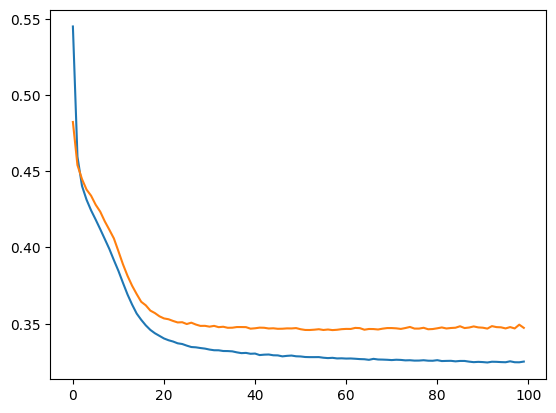

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

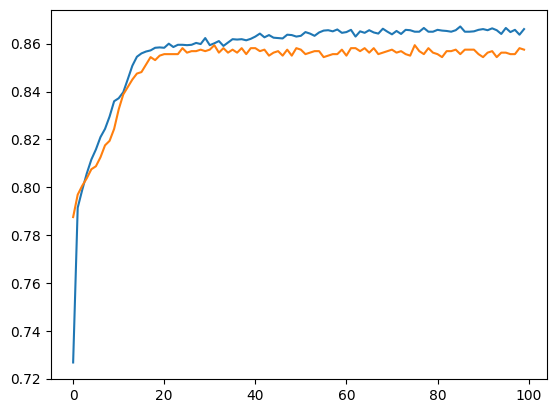

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


#### The Accuracy score shows that the margin of Training accuracy from validation accuracy is nt so high which means that the the model is not so overfitted